In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
iris_df = pd.read_csv("/content/sample_data/iris.csv")

# Split features and target
X = iris_df.drop(columns=["species"])
y = iris_df["species"]

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# SVM with Linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# Display results
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("RBF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

print("\nLinear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Linear Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))


RBF Kernel Accuracy: 1.0
RBF Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Linear Kernel Accuracy: 1.0
Linear Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   0   0   0   0   0   0   0
    0   0   0   0 

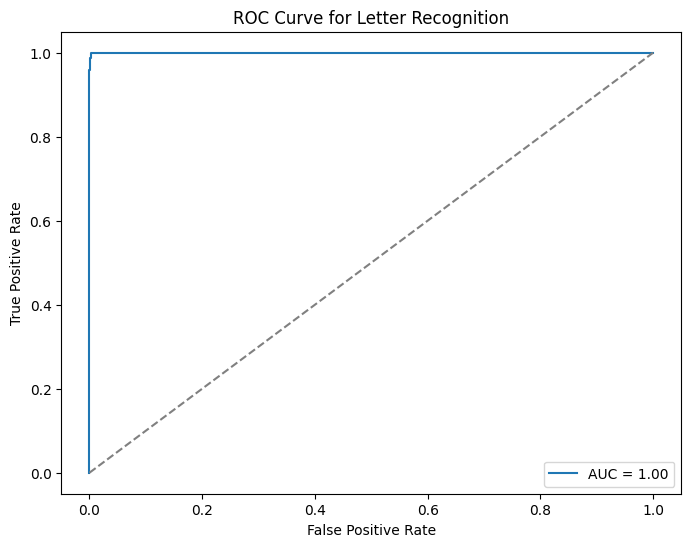

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer

# Load dataset
letter_df = pd.read_csv("/content/sample_data/letter-recognition.csv")

# Split features and target
X = letter_df.drop(columns=["letter"])
y = letter_df["letter"]

# Train-test split (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Classifier
svm_clf = SVC(kernel='rbf', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# Accuracy and Confusion Matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve and AUC Score (One-vs-Rest Approach)
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)
y_score = svm_clf.predict_proba(X_test)

# Compute ROC curve and AUC for the first class
fpr, tpr, _ = roc_curve(y_test_binarized[:, 0], y_score[:, 0])
auc_score = roc_auc_score(y_test_binarized, y_score, multi_class='ovr')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Letter Recognition")
plt.legend()
plt.show()
